<a href="https://colab.research.google.com/github/JamesExeter/AI-Worksheet-6/blob/main/Worksheet_Week_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer Neural Network

In this question we apply a single-layer neural network to a linearly separable toy data set.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron

We start by generating  and visualizing some data

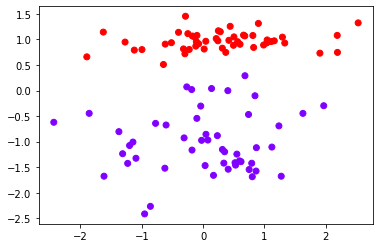

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, \
            n_informative=1, random_state=1,n_clusters_per_class=1)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y, cmap='rainbow')
plt.show()

Notice that the two classes can clearly be separated by a single line. We can now fit a single layer neural network to the data.

In [ ]:
nn=Perceptron(alpha=1, max_iter=1000) 
model=nn.fit(X,y)


We can visualise the performance of this network again using a scatter plot, and colour the using predicted class. Is the network able to give the right classification for each point?

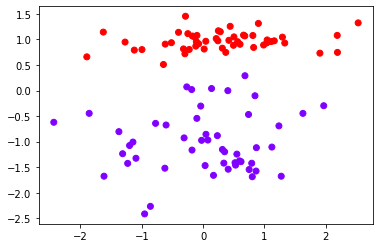

In [ ]:
ypred=model.predict(X)
# TODO: Make a scatter plot 
plt.figure()
plt.scatter(X[:,0],X[:,1],c=ypred, cmap='rainbow')
plt.show()

# Multi-Layer NN on Toy Problems
In this question we consider two toy problems in which the classes are not linearly separable. In the first example the two classes form moon shapes.

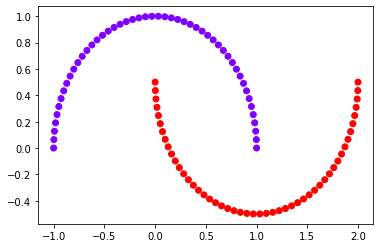

In [ ]:
X1, y1 = make_moons()
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.show()

Try fitting a single-layer neural network to the data. 
Comment on the performance and hypothesise what might be the source of the errors.

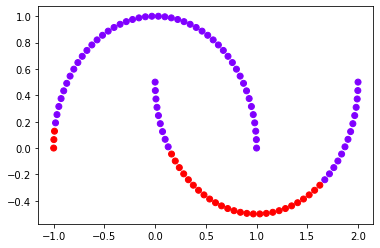

In [ ]:
#TODO
model_for_non_lin=nn.fit(X1,y1)
ypred_non_lin=model_for_non_lin.predict(X1)

plt.figure()
plt.scatter(X1[:,0],X1[:,1],c=ypred_non_lin, cmap='rainbow')
plt.show()

# the neural net only has a single layer so it can't learn data that is too complex
# i.e. non-linear so it will encounter problems that are non-linear in nature
# more layers would add complexity in operations, allowing better classification


We can now try to fit an multi-layer NN to the same data.

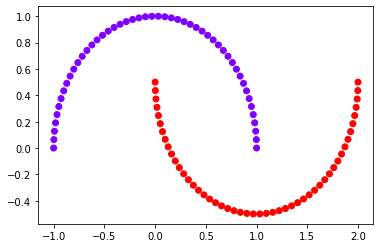

In [ ]:
nn1=MLPClassifier(alpha=1,hidden_layer_sizes=(5,10,20,2), max_iter=1000)
model2=nn1.fit(X1,y1)
ypred2=model2.predict(X1)
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c=ypred2, cmap='rainbow')
plt.show()

This NN has 4 hidden layers each with 10 neurons. The parameter
`hidden_layer_sizes=(x,y,z, ...)` identifies the number of neurons in each layer. Try experimenting with different configurations of hidden layers to see the effect on performance.

Investigate the parameter `activation`. What are the different activation functions?

The activation functions are: 'identity’, ‘logistic’, ‘tanh’, ‘relu’

We now introduce another toy classification problem based on classes in the form of two circles. Experiment with using different NN architectures to fit this data and plot the results.

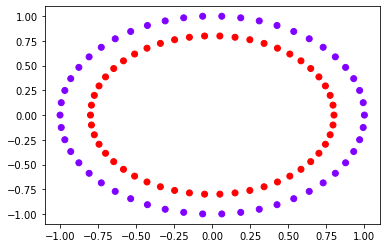

In [ ]:
X2, y2 = make_circles()
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=y2, cmap='rainbow')
plt.show()

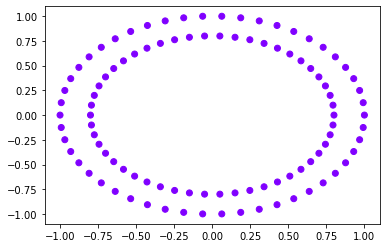

In [15]:
circle_nn = MLPClassifier(alpha=1, hidden_layer_sizes=(5, 10, 15, 15, 2), max_iter=1000, early_stopping=True)
circle_model=circle_nn.fit(X2,y2)
ypred_circle=circle_model.predict(X2)

plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=ypred_circle, cmap='rainbow')
plt.show()

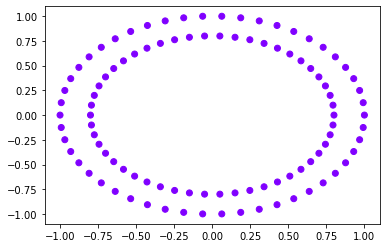

In [17]:
circle_nn2 = MLPClassifier(hidden_layer_sizes=(50, 100, 50, 25, 2), max_iter=1000, early_stopping=True)
circle_model2=circle_nn2.fit(X2,y2)
ypred_circle2=circle_model2.predict(X2)

plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=ypred_circle2, cmap='rainbow')
plt.show()

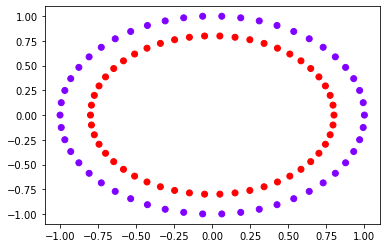

In [64]:
circle_nn3 = MLPClassifier(alpha=1, max_iter=1000)
circle_model3=circle_nn3.fit(X2,y2)
ypred_circle3=circle_model3.predict(X2)

plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=ypred_circle3, cmap='rainbow')
plt.show()

# Handwritten Digit Recognition
The data set contains images of hand-written digits. There are 10 classes where each class refers to a digit. Preprocessing programs were used to extract normalized bitmaps of handwritten digits from a preprinted form.  32 × 32 bitmaps are divided into non-overlapping blocks of 4 × 4 and the number of on pixels are counted in each block. This generates an input matrix of 8 × 8 where each element is an integer in the range 0...16.

In [68]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.datasets import load_digits
digits = load_digits()


Divide the data into training and test sets, fit a NN to the training data and evaulate its accuracy on both training and test data.

In [107]:
#TODO
digits_x = digits.data
digits_y = digits.target

trainX, testX, trainY, testY = train_test_split(digits_x, digits_y, test_size=0.2)
# gives 97.5% on test data
digit_nn = MLPClassifier(alpha=1, hidden_layer_sizes=(64, 64, 50, 25, 10), 
                         max_iter=1000, random_state=42)

# changing alpha to a lower value worsened performance
#digit_nn = MLPClassifier(alpha=0.5, hidden_layer_sizes=(64, 64, 50, 25, 10), 
#                         max_iter=1000, random_state=42, early_stopping=True)

# altered layer sizes gives slightly worse performance of 96.3%
#digit_nn = MLPClassifier(alpha=1, hidden_layer_sizes=(20, 64, 100, 25, 10), 
#                         max_iter=1000, random_state=42, early_stopping=True)

# adding more layers gave a slightly worse performance of 95%
#digit_nn = MLPClassifier(alpha=1, hidden_layer_sizes=(64, 64, 75, 100, 50, 25, 10), 
#                         max_iter=1000, random_state=42, early_stopping=True)

# removing layers also gave a slightly worse performance of 95%
#digit_nn = MLPClassifier(alpha=1, hidden_layer_sizes=(64, 32, 10), 
#                         max_iter=1000, random_state=42, early_stopping=True)

# changing the activation to identity gave a performance of 90%, the worst decrease so far
#digit_nn = MLPClassifier(alpha=1, hidden_layer_sizes=(64, 64, 50, 25, 10), 
#                         max_iter=1000, random_state=42, early_stopping=True,
#                         activation='identity')

# gave a training accuracy of roughly 10%, meaning that the model is just guessing
# the logistic function in this case is a terrible activation choice
#digit_nn = MLPClassifier(alpha=1, hidden_layer_sizes=(64, 64, 50, 25, 10), 
#                         max_iter=1000, random_state=42, early_stopping=True,
#                         activation="logistic")

# the tanh activation gave an accuracy of 95.8%, making it better than tanh and 
# logistic but not as good as relu
#digit_nn = MLPClassifier(alpha=1, hidden_layer_sizes=(64, 64, 50, 25, 10), 
#                         max_iter=1000, random_state=42, early_stopping=True,
#                         activation="tanh")

digit_model = digit_nn.fit(trainX, trainY)
train_y_preds = digit_model.predict(trainX)
test_y_preds = digit_model.predict(testX)

print("Training accuracy:", metrics.accuracy_score(trainY, train_y_preds))
print("Test accuracy:", metrics.accuracy_score(testY, test_y_preds))


Training accuracy: 0.9979123173277662
Test accuracy: 0.975


It is also useful to plot a time series graph of the loss function (error) against iteration.

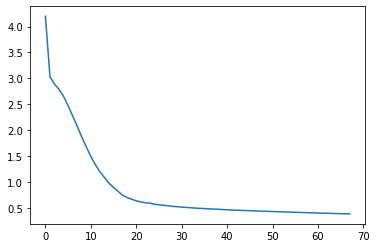

In [88]:
loss_values = digit_model.loss_curve_
plt.figure() 
plt.plot(loss_values)
plt.show()

Try experimenting with different architectures and activation functions. 

In [ ]:
# see the above commented out model declarations for various explorations